# PREPROCESSING TRAINING DATA

In [113]:
import pandas as pd
train_full_df = pd.read_csv("NSLKDD_TRAIN.csv")
train_full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [114]:
train_full_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [115]:
train_full_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [116]:
train_full_df['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [117]:
train_full_df['protocol_type'].value_counts()                   

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [118]:
train_full_df['service'].value_counts() 

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [119]:
train_full_df['flag'].value_counts() 

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [120]:
attack_types = {
    "back":"DOS",
    "land":"DOS",
    "neptune":"DOS",
    "pod":"DOS",
    "smurf":"DOS",
    "teardrop":"DOS",
    "apache2":"DOS",
    "udpstorm":"DOS",
    "processtable":"DOS",
    "worm":"DOS",
    "satan":"PROBE",
    "ipsweep":"PROBE",
    "nmap":"PROBE",
    "portsweep":"PROBE",
    "mscan":"PROBE",
    "saint":"PROBE",
    "guess_passwd":"R2L",
    "ftp_write":"R2L",
    "imap":"R2L",
    "phf":"R2L",
    "multihop":"R2L",
    "warezmaster":"R2L",
    "warezclient":"R2L",
    "spy":"R2L",
    "xlock":"R2L",
    "xsnoop":"R2L",
    "snmpguess":"R2L",
    "snmpgetattack":"R2L",
    "httptunnel":"R2L",
    "sendmail":"R2L",
    "named":"R2L",
    "buffer_overflow":"U2R",
    "loadmodule":"U2R",
    "rootkit":"U2R",
    "perl":"U2R",
    "sqlattack":"U2R",
    "xterm":"U2R",
    "ps":"U2R",
    "mailbomb":"DOS",
    "normal":"NORMAL"
    
}



In [121]:
train_full_df['attack']=train_full_df['attack'].map(attack_types)

In [122]:
train_full_df['attack'].value_counts()  

NORMAL    67342
DOS       45927
PROBE     11656
R2L         995
U2R          52
Name: attack, dtype: int64

# LABEL ENCODING FOR THE TRAINING DATA

In [123]:
from sklearn.preprocessing import LabelEncoder
cat_features =['protocol_type','service','flag','attack']
train_le = LabelEncoder()
for feature_name in cat_features:
    train_full_df[feature_name] = train_le.fit_transform(train_full_df[feature_name])
    print(f'Encoded classes for {feature_name} {train_le.classes_}')

Encoded classes for protocol_type ['icmp' 'tcp' 'udp']
Encoded classes for service ['IRC' 'X11' 'Z39_50' 'aol' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf'
 'daytime' 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs'
 'exec' 'finger' 'ftp' 'ftp_data' 'gopher' 'harvest' 'hostnames' 'http'
 'http_2784' 'http_443' 'http_8001' 'imap4' 'iso_tsap' 'klogin' 'kshell'
 'ldap' 'link' 'login' 'mtp' 'name' 'netbios_dgm' 'netbios_ns'
 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u' 'other' 'pm_dump' 'pop_2'
 'pop_3' 'printer' 'private' 'red_i' 'remote_job' 'rje' 'shell' 'smtp'
 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet' 'tftp_u' 'tim_i'
 'time' 'urh_i' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
Encoded classes for flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
Encoded classes for attack ['DOS' 'NORMAL' 'PROBE' 'R2L' 'U2R']


In [124]:
train_full_df['attack'].value_counts()

1    67342
0    45927
2    11656
3      995
4       52
Name: attack, dtype: int64

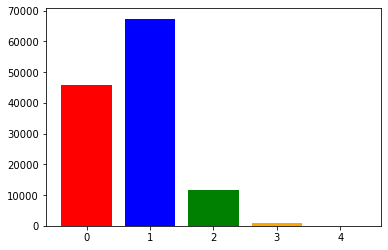

In [125]:
import matplotlib.pyplot as plt
attack_summary = train_full_df['attack'].value_counts().to_frame()
attack_summary = attack_summary.reset_index()
attack_summary.rename(columns={'index':'attack_type','attack':'count'},inplace=True)
plt.bar(attack_summary['attack_type'],attack_summary['count'],color=['blue','red','green','orange','orange'])
plt.show()

In [126]:
train_full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0,20
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,21
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1,18
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,20


# FEATURE SELECTION FOR TOP 10 BEST FEATURES

In [127]:
IND_VAR = train_full_df.drop(labels=['attack'],axis=1).to_numpy()
DEP_VAR = train_full_df['attack'].to_numpy()

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
ordered_rank_features = SelectKBest(score_func=f_classif,k=5)
ordered_features = ordered_rank_features.fit(IND_VAR,DEP_VAR)
ordered_features.scores_

/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/chavamanish/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([1.63215157e+03, 3.15619297e+03, 2.87258287e+03, 2.53527802e+04,
       1.14526361e+01, 5.26983452e+00, 3.55448797e+00, 4.45743192e+02,
       3.42017040e+01, 4.13716540e+03, 3.84842524e+02, 3.19608083e+04,
       3.31115377e+00, 2.64745490e+03, 1.59994192e+01, 4.14968029e+00,
       5.00184249e+01, 4.96445585e+02, 4.54626939e+01,            nan,
       2.17652221e-01, 2.88231817e+03, 2.14280897e+04, 2.42272698e+02,
       5.14255830e+04, 5.11632637e+04, 4.48735799e+03, 4.54642057e+03,
       6.80183252e+04, 4.56921125e+03, 3.86846525e+03, 9.43281537e+03,
       3.46257093e+04, 3.41058705e+04, 1.31025095e+04, 1.37785525e+04,
       8.17582980e+03, 5.21211256e+04, 5.30766608e+04, 3.81960815e+03,
       4.58492201e+03, 2.01459980e+04])

In [129]:
scores_df = pd.DataFrame(ordered_features.scores_,columns=['feature_score'])
ind_features = train_full_df.drop(labels=['attack'],axis=1)
features_df = pd.DataFrame(ind_features.columns,columns=['feature'])

In [130]:
features_scores = pd.concat([features_df,scores_df],axis=1)
#features_scores.columns=['feature','feature_score']
features_scores

,feature,feature_score
0,duration,1632.151572
1,protocol_type,3156.192971
2,service,2872.582869
3,flag,25352.780246
4,src_bytes,11.452636
5,dst_bytes,5.269835
6,land,3.554488
7,wrong_fragment,445.743192
8,urgent,34.201704
9,hot,4137.165398


In [131]:
top_10_features_df = features_scores.nlargest(10,'feature_score')
top_10_features_df

,feature,feature_score
28,same_srv_rate,68018.325211
38,dst_host_srv_serror_rate,53076.660833
37,dst_host_serror_rate,52121.125570
24,serror_rate,51425.583039
25,srv_serror_rate,51163.263717
32,dst_host_srv_count,34625.709258
33,dst_host_same_srv_rate,34105.870452
11,logged_in,31960.808254
3,flag,25352.780246
22,count,21428.089709


In [132]:
top_15_features_df = features_scores.nlargest(15,'feature_score')
top_15_features = list(top_15_features_df['feature'])
top_15_features.append('attack')

In [133]:
top_6_features_df = features_scores.nlargest(6,'feature_score')
top_6_features = list(top_6_features_df['feature'])
top_6_features.append('attack')

In [134]:
top_10_features = list(top_10_features_df['feature'])
top_10_features.append('attack')
print(top_10_features)


['same_srv_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'count', 'attack']


In [135]:
train_df_10=train_full_df[top_10_features]
train_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,0


In [136]:
train_df_15=train_full_df[top_15_features]
train_df_15

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,last_flag,dst_host_same_src_port_rate,dst_host_diff_srv_rate,dst_host_count,dst_host_srv_diff_host_rate,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,15,0.88,0.60,255,0.00,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,19,0.00,0.05,255,0.00,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,21,0.03,0.00,30,0.04,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,21,0.00,0.00,255,0.00,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,21,0.00,0.07,255,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,20,0.00,0.06,255,0.00,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,21,0.01,0.01,255,0.00,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,18,0.00,0.06,255,0.00,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,20,0.00,0.05,255,0.00,0


In [137]:
train_df_6=train_full_df[top_6_features]
train_df_6

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,attack
0,0.08,0.00,0.00,0.0,0.0,1,1
1,0.05,1.00,1.00,1.0,1.0,26,0
2,1.00,0.01,0.03,0.2,0.2,255,1
3,1.00,0.00,0.00,0.0,0.0,255,1
4,0.16,0.00,0.00,0.0,0.0,19,0
...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0
125968,1.00,0.00,0.00,0.0,0.0,244,1
125969,1.00,0.00,0.72,0.0,0.0,30,1
125970,0.06,1.00,1.00,1.0,1.0,8,0


In [138]:
train_df_10.to_csv ("NSLKDD_top_10_TRAIN.csv", index=None)

In [139]:
train_df_15.to_csv ("NSLKDD_top_15_TRAIN.csv", index=None)

In [140]:
train_df_6.to_csv ("NSLKDD_top_6_TRAIN.csv", index=None)

# PREPROCESSING TESTING DATA

In [141]:
test_full_df = pd.read_csv("NSLKDD_Test.CSV")
test_full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [142]:
test_full_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [143]:
test_full_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [144]:
test_full_df['attack'].value_counts()  

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

In [145]:
test_full_df['protocol_type'].value_counts()  

tcp     18879
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [146]:
test_full_df['service'].value_counts()  

http       7853
private    4773
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i         6
tftp_u        1
Name: service, Length: 64, dtype: int64

In [147]:
test_full_df['flag'].value_counts()  

SF        14875
REJ        3849
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64

In [148]:
test_full_df['attack'] = test_full_df['attack'].map(attack_types) 

In [149]:
test_full_df['attack'].value_counts()  

NORMAL    9711
DOS       7459
R2L       2885
PROBE     2421
U2R         67
Name: attack, dtype: int64

In [150]:
test_full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,DOS,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,NORMAL,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,PROBE,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,PROBE,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,NORMAL,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,NORMAL,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,NORMAL,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,DOS,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,NORMAL,21


# LABEL ENCODING FOR TESTING DATA

In [151]:
test_le = LabelEncoder()
for feature_name in cat_features:
    test_full_df[feature_name] = test_le.fit_transform(test_full_df[feature_name])
    print(f'Encoded classes for {feature_name} {test_le.classes_}')

Encoded classes for protocol_type ['icmp' 'tcp' 'udp']
Encoded classes for service ['IRC' 'X11' 'Z39_50' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf' 'daytime'
 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs' 'exec'
 'finger' 'ftp' 'ftp_data' 'gopher' 'hostnames' 'http' 'http_443' 'imap4'
 'iso_tsap' 'klogin' 'kshell' 'ldap' 'link' 'login' 'mtp' 'name'
 'netbios_dgm' 'netbios_ns' 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u'
 'other' 'pm_dump' 'pop_2' 'pop_3' 'printer' 'private' 'remote_job' 'rje'
 'shell' 'smtp' 'sql_net' 'ssh' 'sunrpc' 'supdup' 'systat' 'telnet'
 'tftp_u' 'tim_i' 'time' 'urp_i' 'uucp' 'uucp_path' 'vmnet' 'whois']
Encoded classes for flag ['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
Encoded classes for attack ['DOS' 'NORMAL' 'PROBE' 'R2L' 'U2R']


In [152]:
test_full_df['attack'].value_counts()  

1    9711
0    7459
3    2885
2    2421
4      67
Name: attack, dtype: int64

In [153]:
test_full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0,21
1,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1,21
2,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,2,15
3,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,2,11
4,0,1,22,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1,21
22539,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1,21
22540,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0,15
22541,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1,21


In [154]:
test_df_10 = test_full_df[top_10_features]
test_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.01,0.0,0.00,0.0,0.00,1,0.00,0,1,136,0
1,1.00,0.0,0.00,0.0,0.00,86,0.61,0,9,1,1
2,1.00,0.0,0.00,0.0,0.00,57,1.00,0,9,1,2
3,1.00,0.0,0.00,0.0,0.12,86,0.31,0,2,1,2
4,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...
22538,1.00,0.0,0.01,0.0,0.00,141,0.72,1,9,1,1
22539,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,2,1
22540,1.00,0.0,0.00,0.0,0.00,255,1.00,1,9,5,0
22541,1.00,0.0,0.00,0.0,0.00,252,0.99,0,9,4,1


In [155]:
test_df_15 = test_full_df[top_15_features]
test_df_15

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,last_flag,dst_host_same_src_port_rate,dst_host_diff_srv_rate,dst_host_count,dst_host_srv_diff_host_rate,attack
0,0.01,0.0,0.00,0.0,0.00,1,0.00,0,1,136,21,0.00,0.06,255,0.00,0
1,1.00,0.0,0.00,0.0,0.00,86,0.61,0,9,1,21,0.61,0.04,134,0.02,1
2,1.00,0.0,0.00,0.0,0.00,57,1.00,0,9,1,15,1.00,0.00,3,0.28,2
3,1.00,0.0,0.00,0.0,0.12,86,0.31,0,2,1,11,0.03,0.17,29,0.02,2
4,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,4,21,0.01,0.00,155,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1.00,0.0,0.01,0.0,0.00,141,0.72,1,9,1,21,0.01,0.06,100,0.01,1
22539,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,2,21,0.01,0.00,197,0.01,1
22540,1.00,0.0,0.00,0.0,0.00,255,1.00,1,9,5,15,0.00,0.00,255,0.00,0
22541,1.00,0.0,0.00,0.0,0.00,252,0.99,0,9,4,21,0.00,0.01,255,0.00,1


In [156]:
test_df_6 = test_full_df[top_6_features]
test_df_6

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,attack
0,0.01,0.0,0.00,0.0,0.00,1,0
1,1.00,0.0,0.00,0.0,0.00,86,1
2,1.00,0.0,0.00,0.0,0.00,57,2
3,1.00,0.0,0.00,0.0,0.12,86,2
4,1.00,0.0,0.01,0.0,0.00,255,1
...,...,...,...,...,...,...,...
22538,1.00,0.0,0.01,0.0,0.00,141,1
22539,1.00,0.0,0.01,0.0,0.00,255,1
22540,1.00,0.0,0.00,0.0,0.00,255,0
22541,1.00,0.0,0.00,0.0,0.00,252,1


In [157]:
train_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,0


In [158]:
test_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.01,0.0,0.00,0.0,0.00,1,0.00,0,1,136,0
1,1.00,0.0,0.00,0.0,0.00,86,0.61,0,9,1,1
2,1.00,0.0,0.00,0.0,0.00,57,1.00,0,9,1,2
3,1.00,0.0,0.00,0.0,0.12,86,0.31,0,2,1,2
4,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...
22538,1.00,0.0,0.01,0.0,0.00,141,0.72,1,9,1,1
22539,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,2,1
22540,1.00,0.0,0.00,0.0,0.00,255,1.00,1,9,5,0
22541,1.00,0.0,0.00,0.0,0.00,252,0.99,0,9,4,1


In [159]:
train_df_10.to_csv ("NSLKDD_top_10_TEST.csv", index=None)

In [160]:
train_df_15.to_csv ("NSLKDD_top_15_TEST.csv", index=None)

In [161]:
train_df_6.to_csv ("NSLKDD_top_6_TEST.csv", index=None)

In [162]:
DATAFRAME_train = pd.read_csv("NSLKDD_top_10_TRAIN.csv")
DATAFRAME_train

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,0


In [163]:
DATAFRAME_test = pd.read_csv("NSLKDD_top_10_TEST.csv")
DATAFRAME_test

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,0


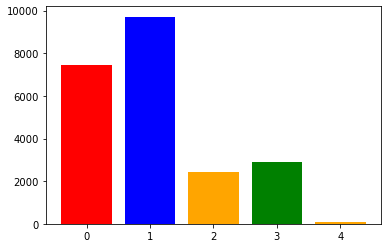

In [164]:
attack_summary = test_full_df['attack'].value_counts().to_frame()
attack_summary = attack_summary.reset_index()
attack_summary.rename(columns={'index':'attack_type','attack':'count'},inplace=True)
plt.bar(attack_summary['attack_type'],attack_summary['count'],color=['blue','red','green','orange','orange'])
plt.show()

In [165]:
train_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.08,0.00,0.00,0.0,0.0,1,0.00,0,9,13,1
1,0.05,1.00,1.00,1.0,1.0,26,0.10,0,5,123,0
2,1.00,0.01,0.03,0.2,0.2,255,1.00,1,9,5,1
3,1.00,0.00,0.00,0.0,0.0,255,1.00,1,9,30,1
4,0.16,0.00,0.00,0.0,0.0,19,0.07,0,1,121,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0.14,1.00,1.00,1.0,1.0,25,0.10,0,5,184,0
125968,1.00,0.00,0.00,0.0,0.0,244,0.96,0,9,2,1
125969,1.00,0.00,0.72,0.0,0.0,30,0.12,1,9,1,1
125970,0.06,1.00,1.00,1.0,1.0,8,0.03,0,5,144,0


In [166]:
test_df_10

,same_srv_rate,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,logged_in,flag,count,attack
0,0.01,0.0,0.00,0.0,0.00,1,0.00,0,1,136,0
1,1.00,0.0,0.00,0.0,0.00,86,0.61,0,9,1,1
2,1.00,0.0,0.00,0.0,0.00,57,1.00,0,9,1,2
3,1.00,0.0,0.00,0.0,0.12,86,0.31,0,2,1,2
4,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...
22538,1.00,0.0,0.01,0.0,0.00,141,0.72,1,9,1,1
22539,1.00,0.0,0.01,0.0,0.00,255,1.00,1,9,2,1
22540,1.00,0.0,0.00,0.0,0.00,255,1.00,1,9,5,0
22541,1.00,0.0,0.00,0.0,0.00,252,0.99,0,9,4,1
